In [23]:
import numpy as np
import matplotlib.pyplot as plt
import P_Cyg as pc
from glob import glob
import pandas as pd
from astropy.time import Time
from astropy.stats import LombScargle

In [36]:
datadir = 'C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/synthetic_filters/'
red = datadir+"pfiloutput_RedOnlyObservations.txt"
ret = datadir+"pfiloutput_ReticonObservations.txt"
rb = datadir+"pfiloutput_RedAndBlueObservations.txt"
figdir="C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Figures/synthetic_filters/"
posterdir="C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Figures/Poster/"

In [3]:
red_good_rows = [3,8,13,18]
rb_good_rows = []
ret_good_rows = []
row = 0
while row <=1000:
    if (row-3)%11 in [0,1,2,3,4,5,6]:
        rb_good_rows.append(row)
    if (row-3)%9  in [0,1,2,3,4]:
        ret_good_rows.append(row)
    row+=1
#Reading in the data
reddf = pd.read_csv(red,delim_whitespace=True,names=["filter","q","u","pol","pa","qerror","uerror","polerror","paerror"],skip_blank_lines=True,
                 skiprows=lambda x: x not in red_good_rows)

rbdf = pd.read_csv(rb,delim_whitespace=True,names=["filter","q","u","pol","pa","qerror","uerror","polerror","paerror"],skip_blank_lines=True,
                 skiprows=lambda x: x not in rb_good_rows)

retdf = pd.read_csv(ret,delim_whitespace=True,names=["filter","q","u","pol","pa","qerror","uerror","polerror","paerror"],skip_blank_lines=True,
                 skiprows=lambda x: x not in ret_good_rows)

In [4]:
red_date_rows,rb_date_rows,ret_date_rows = [],[],[]
row = 0
while row <= 500:
    if (row-1)%5 == 0:
        red_date_rows.append(row)
    if (row-1)%9 == 0:
        ret_date_rows.append(row)
    if (row-1)%11 == 0:
        rb_date_rows.append(row)
    row+=1
#Reading in dates, cause god damn
red_dates = pd.read_csv(red,skiprows=lambda x: x not in red_date_rows,names=["date"],squeeze=True,
                        converters={"date":lambda x:Time(x[14:18]+'-'+x[18:20]+'-'+x[20:22]).mjd})

rb_dates = pd.read_csv(rb,skiprows=lambda x: x not in rb_date_rows,names=["date"],squeeze=True,
                        converters={"date":lambda x:Time(x[14:18]+'-'+x[18:20]+'-'+x[20:22]).mjd})

ret_dates = pd.read_csv(ret,skiprows=lambda x: x not in ret_date_rows,names=["date"],squeeze=True,
                        converters={"date":lambda x:Time(x[14:18]+'-'+x[18:20]+'-'+x[20:22]).mjd})

In [5]:
reddf["date"] = red_dates
rbdf["date"] = rb_dates
retdf["date"]= ret_dates
date_ind = 0
for i in range(len(rbdf["filter"])):
    rbdf["date"][i] = rb_dates[date_ind]
    if (i+1)%7 == 0 and i != 0:
        date_ind += 1
date_ind = 0
for i in range(len(retdf["filter"])):
    retdf["date"][i] = ret_dates[date_ind]
    if (i+1)%5 == 0 and i != 0:
        date_ind += 1

C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
t = reddf.append(rbdf)
t = t.append(retdf,ignore_index=True)

In [18]:
ux = t[t["filter"]=="UX"].sort_values(by=["date"]).reset_index()
i = t[t["filter"]=="I"].sort_values(by=["date"]).reset_index()
b = t[t["filter"]=="B"].sort_values(by=["date"]).reset_index()
v = t[t["filter"]=="V"].sort_values(by=["date"]).reset_index()
r = t[t["filter"]=="R"].sort_values(by=["date"]).reset_index()

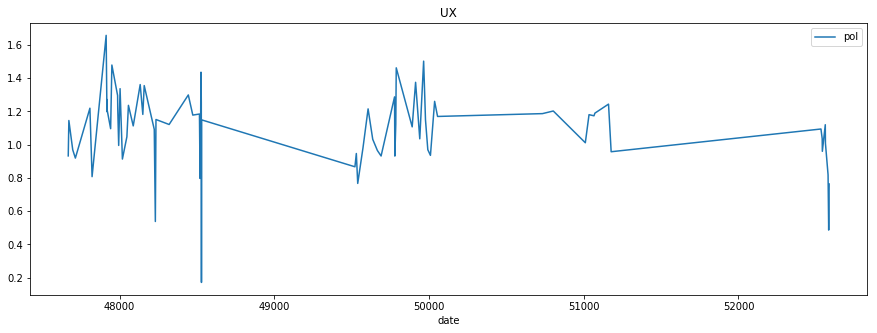

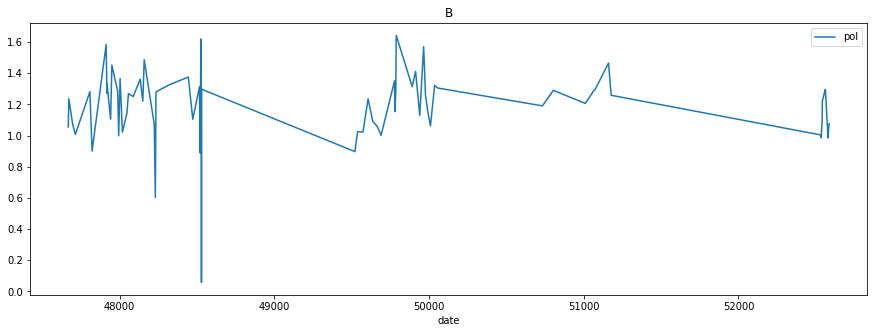

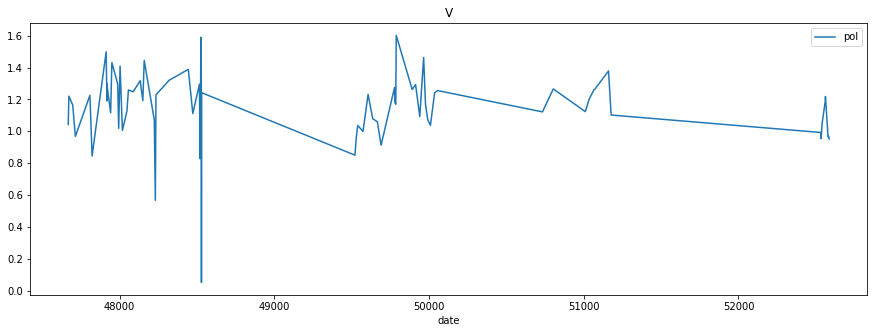

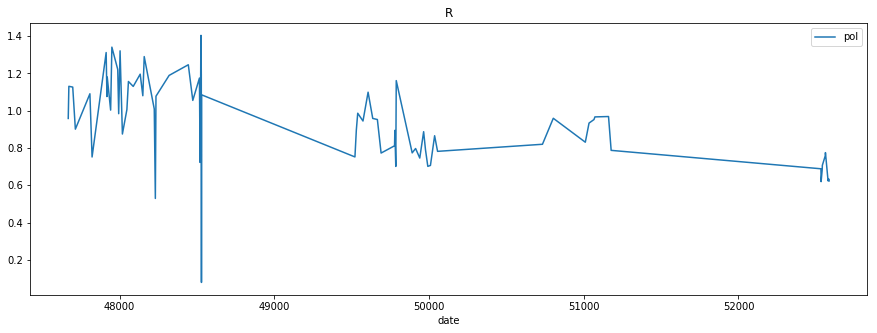

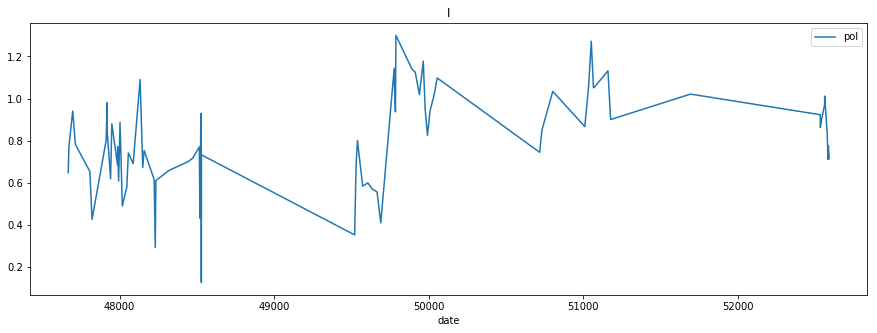

In [8]:
for df in [ux,b,v,r,i]:
    df.plot("date","pol",figsize=(15,5))
    plt.title(str(df["filter"][0]))
    plt.show()

In [9]:
for df in [ux,b,v,r,i]:
    period,power,LS = pc.hybrid_periodogram(df["date"],df["pol"],df["polerror"],give_ls=True)
    fal = np.linspace(0,1,len(period))
    fa_peak = LS.false_alarm_level(fal)
    pdf = pd.DataFrame({"Period":period , "Power":power, "Filter":df["filter"][0], "False Alarm Level":fal , "Peak Height":fa_peak})
    pdf.to_csv(datadir+df["filter"][0]+"_periodogram.txt",sep=":")

C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\astropy\stats\lombscargle\_statistics.py:255: RuntimeWarning: invalid value encountered in power
  * np.sqrt(0.5 * NH * Z))
C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\astropy\stats\lombscargle\_statistics.py:286: RuntimeWarning: divide by zero encountered in log
  fap_s = -np.expm1(np.log(1 - fap) / N_eff)
C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\astropy\stats\lombscargle\_statistics.py:143: RuntimeWarning: invalid value encountered in power
  return (1 - z) ** (0.5 * Nk)


In [10]:
ux_pgram = pd.read_csv(datadir+"UX_periodogram.txt",sep=":",index_col=0)
b_pgram = pd.read_csv(datadir+"B_periodogram.txt",sep=":",index_col=0)
v_pgram = pd.read_csv(datadir+"V_periodogram.txt",sep=":",index_col=0)
r_pgram = pd.read_csv(datadir+"R_periodogram.txt",sep=":",index_col=0)
i_pgram = pd.read_csv(datadir+"I_periodogram.txt",sep=":",index_col=0)

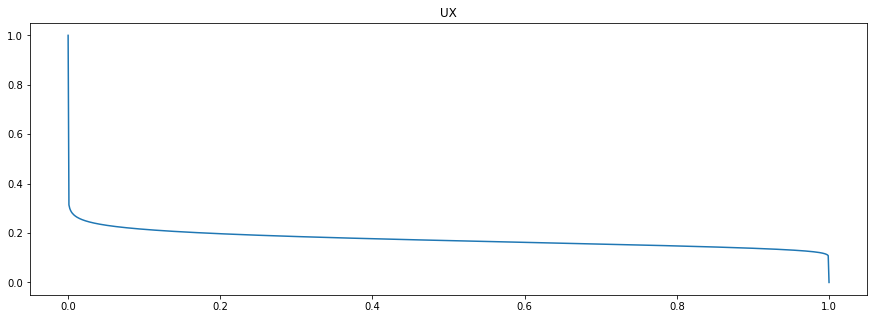

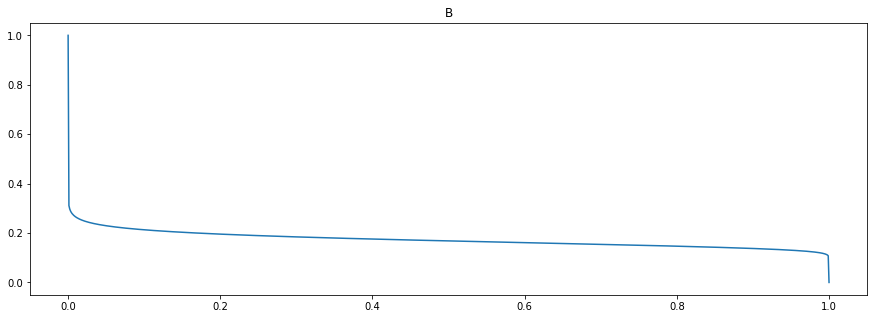

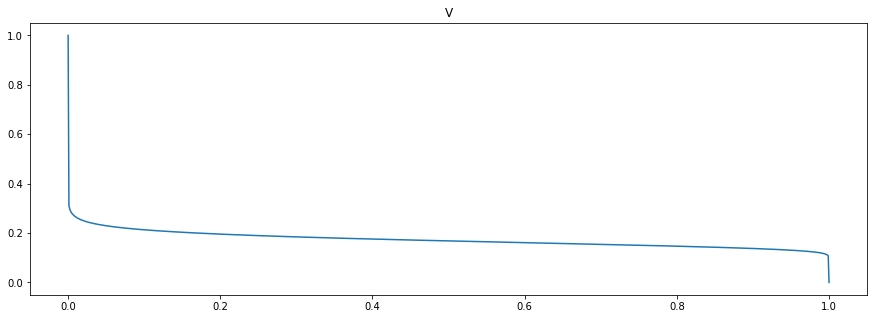

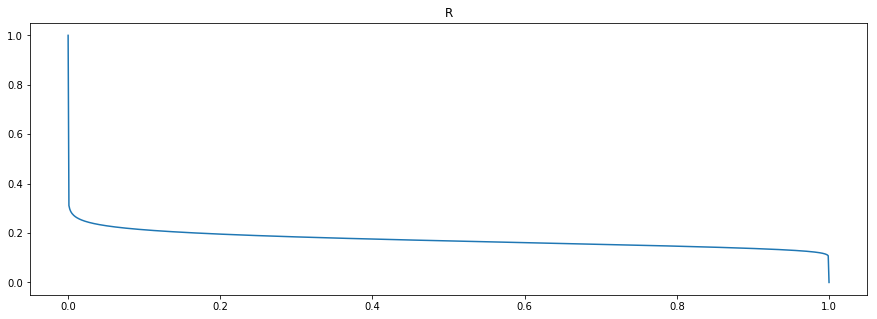

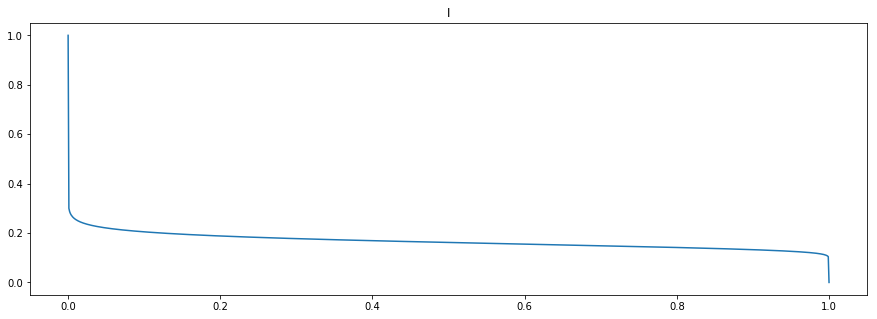

In [11]:
for df in [ux_pgram,b_pgram,v_pgram,r_pgram,i_pgram]:
    period,power = df["Period"],df["Power"]
    fal,peak = df["False Alarm Level"],df["Peak Height"]
    plt.figure(figsize=(15,5))
    plt.plot(fal,peak)
    plt.title(df["Filter"][0])
    plt.show()

C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


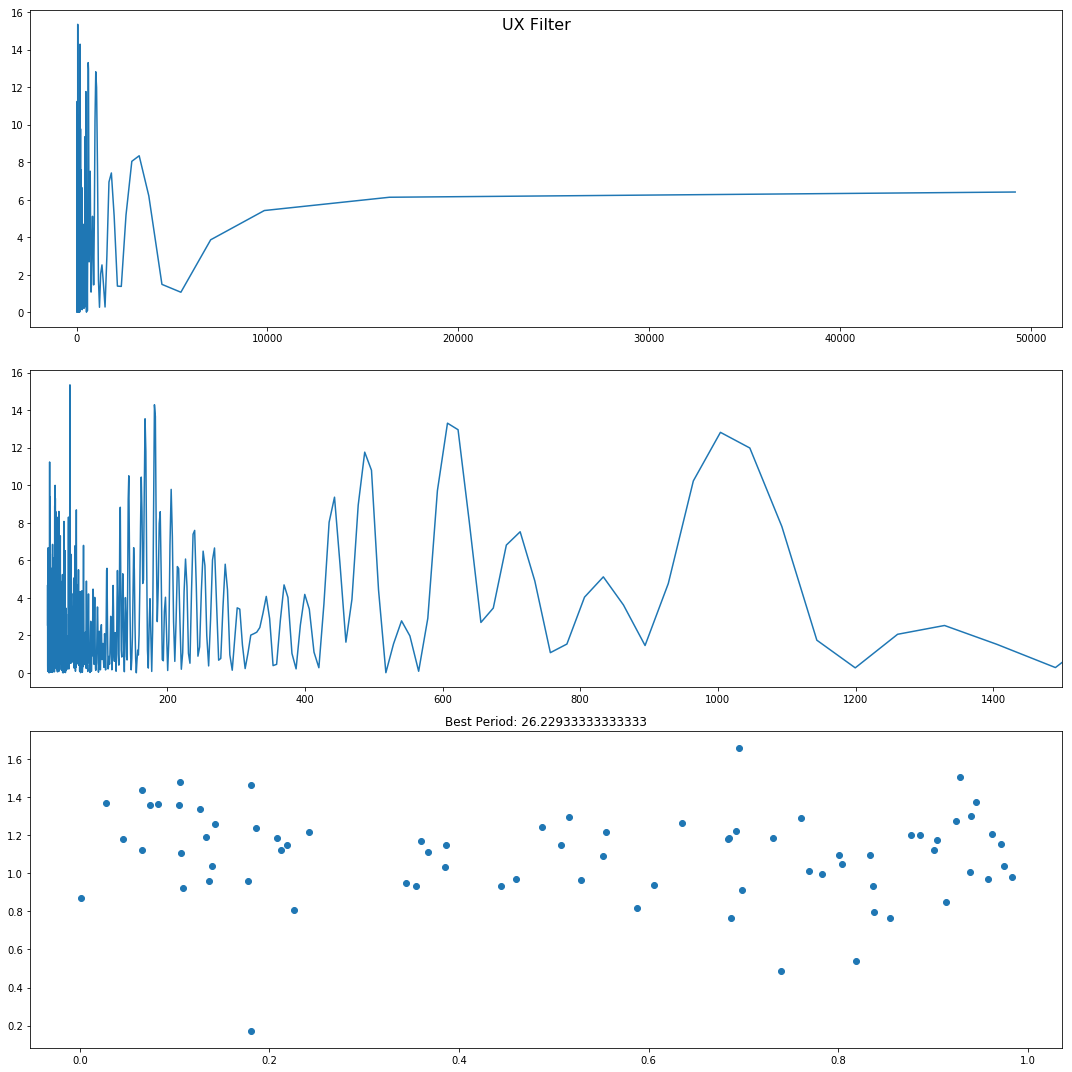

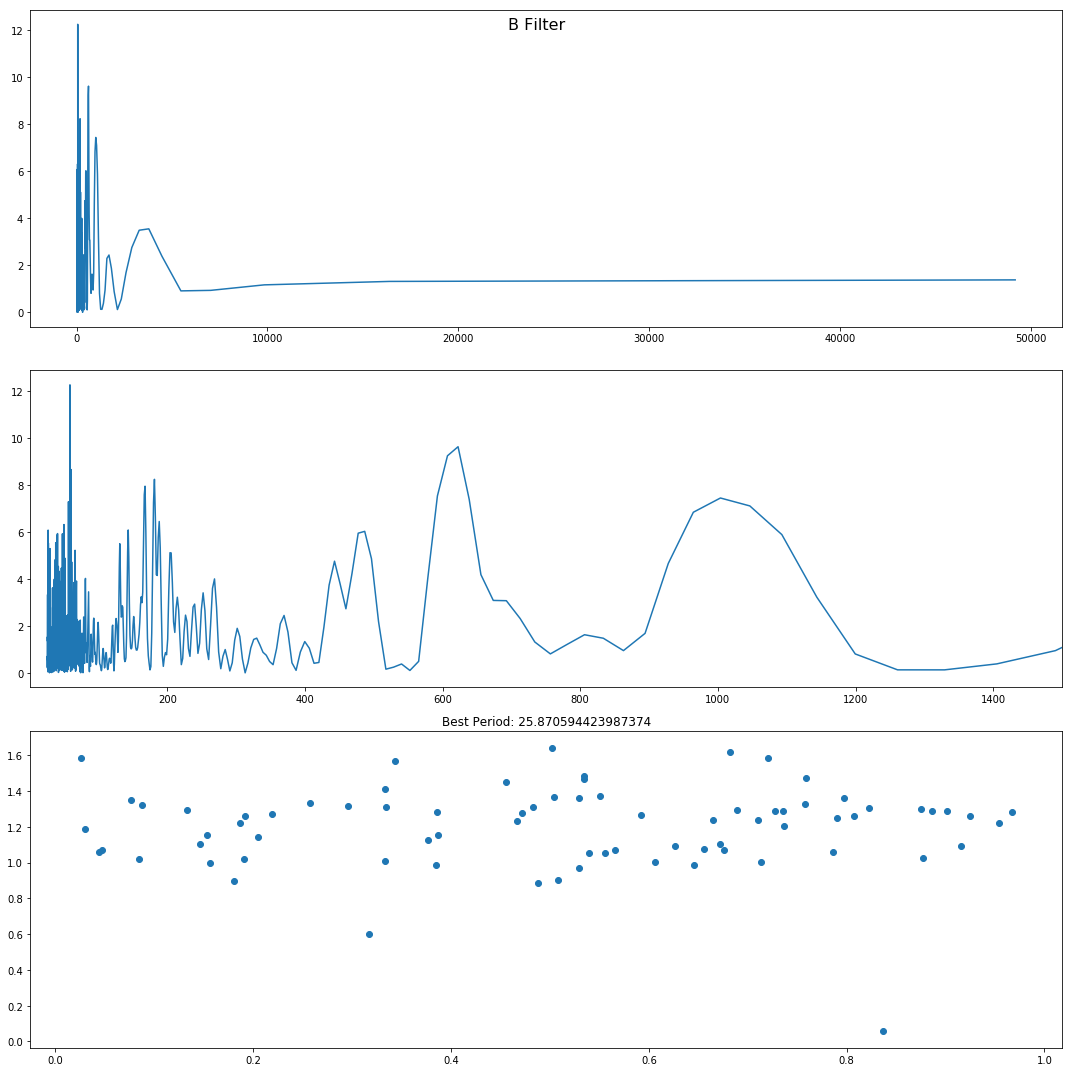

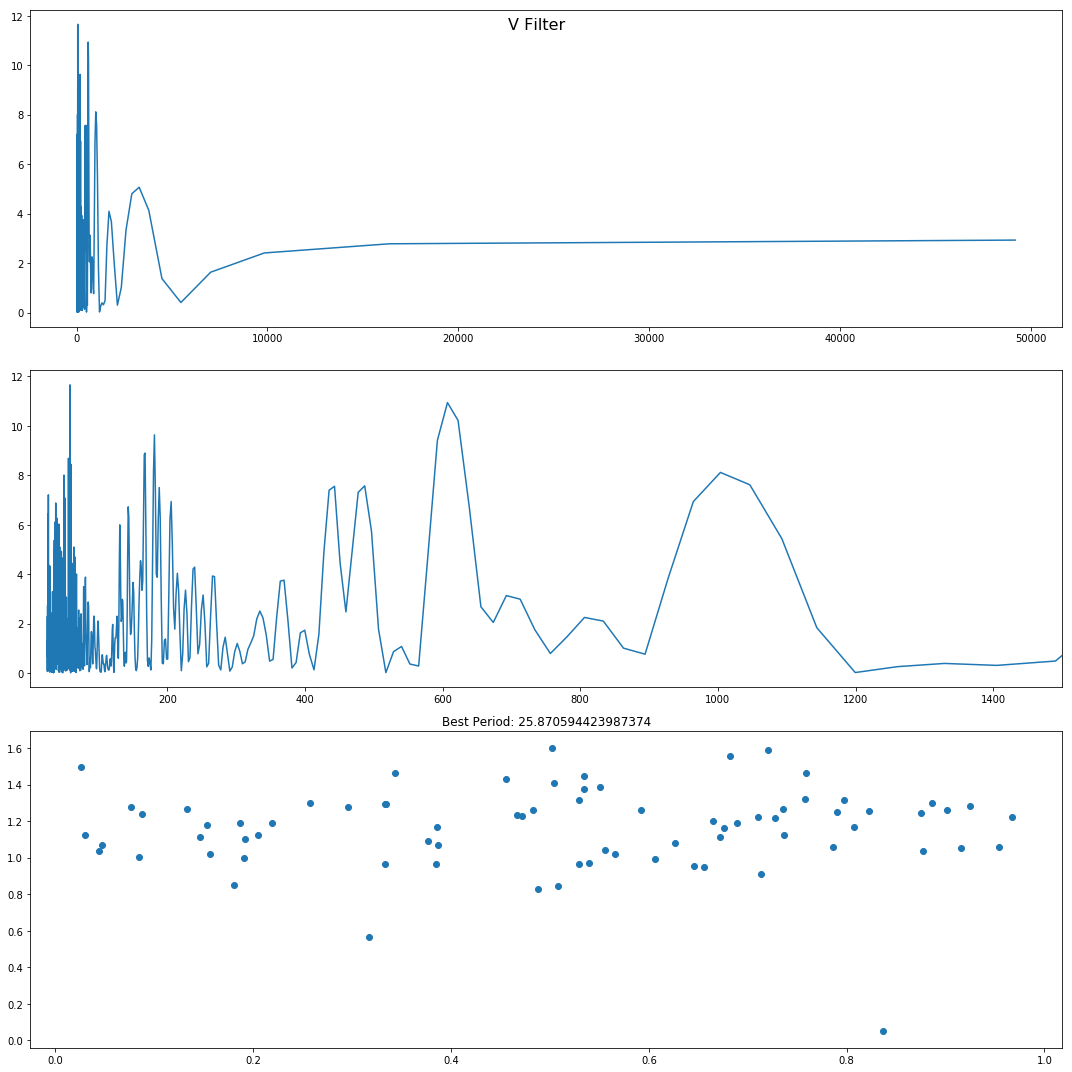

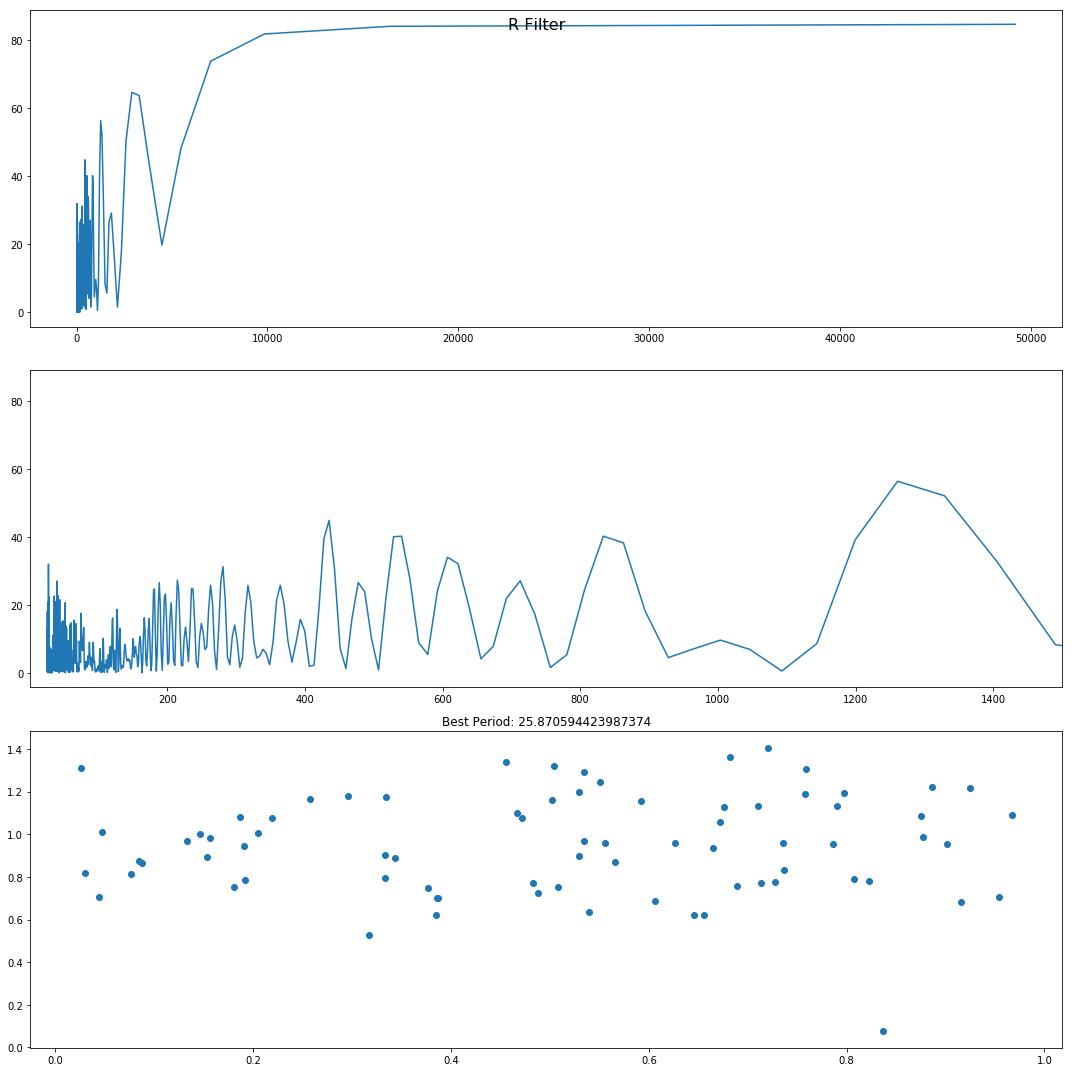

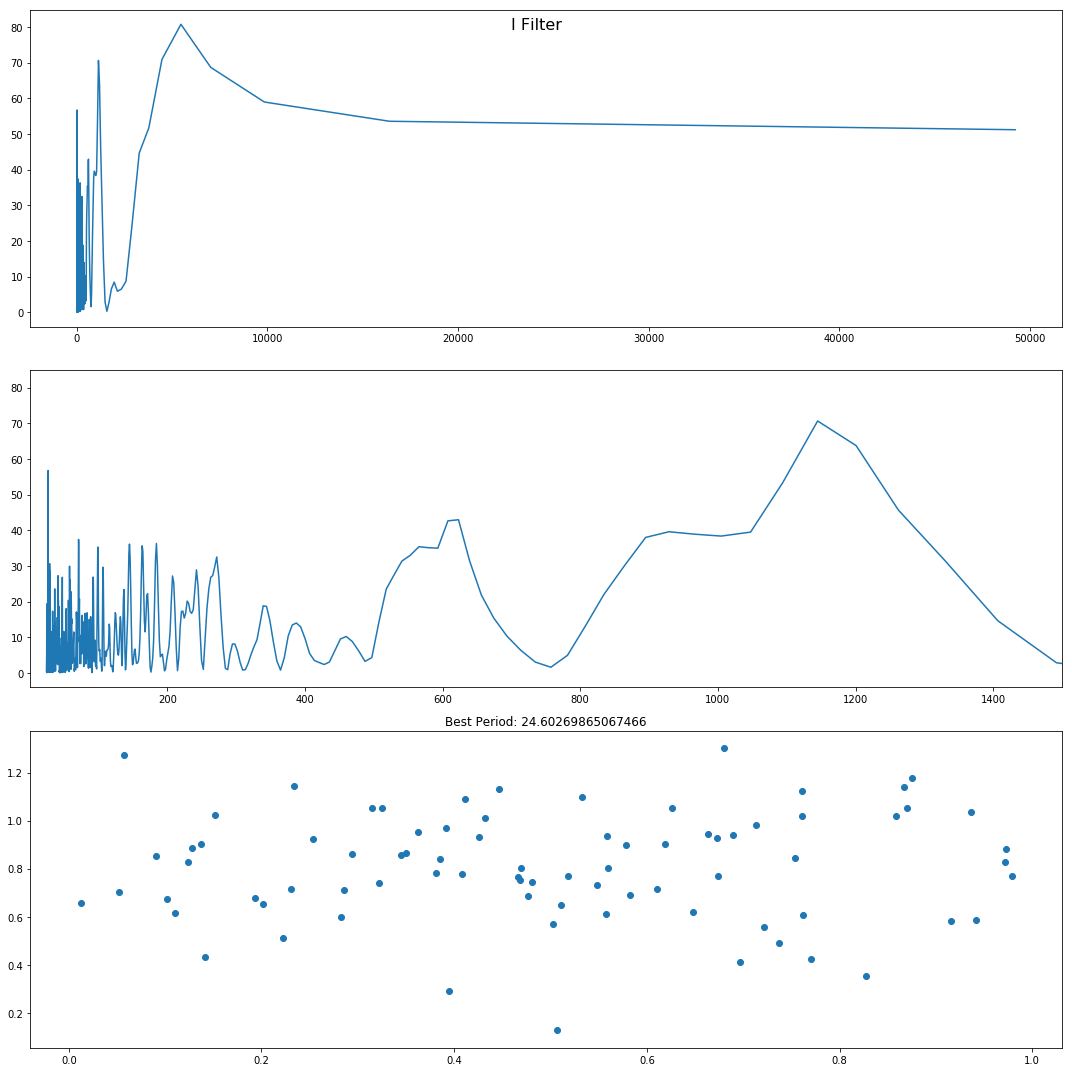

In [12]:
for df,pdf in zip([ux,b,v,r,i],[ux_pgram,b_pgram,v_pgram,r_pgram,i_pgram]):
    period,power = pdf["Period"],pdf["Power"]
    fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,15),tight_layout=True)
    fig.suptitle(str(df["filter"][0])+ " Filter",fontsize=16)
    ax1.plot(period,power)
    ax2.plot(period,power)
    ax2.set_xlim(1,1500)
    best_period = pc.find_best_period(period, power)
    phase_times = (df["date"] / best_period) % 1
    ax3.scatter(phase_times,df["pol"])
    ax3.set_title("Best Period: "+str(best_period))
    #fig.savefig(figdir+str(df["filter"][0])+".png",dpi=300)

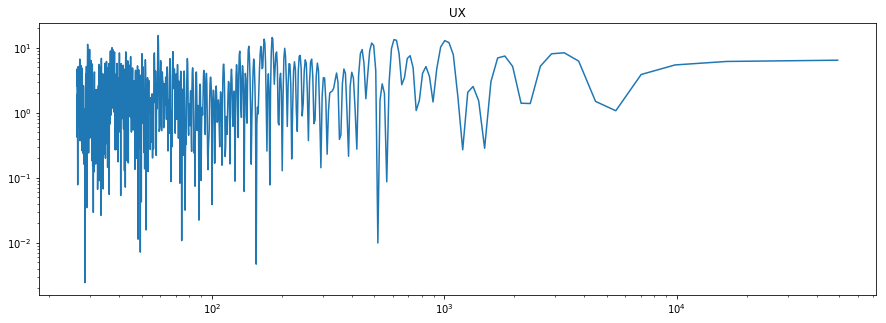

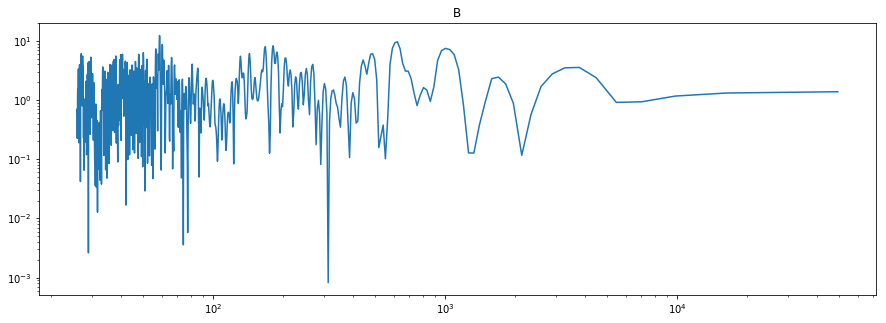

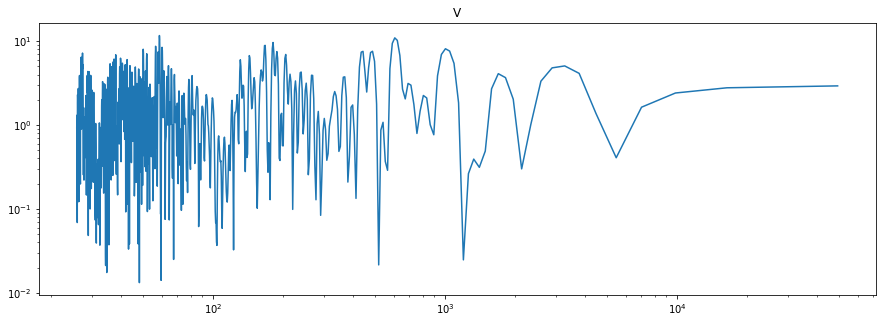

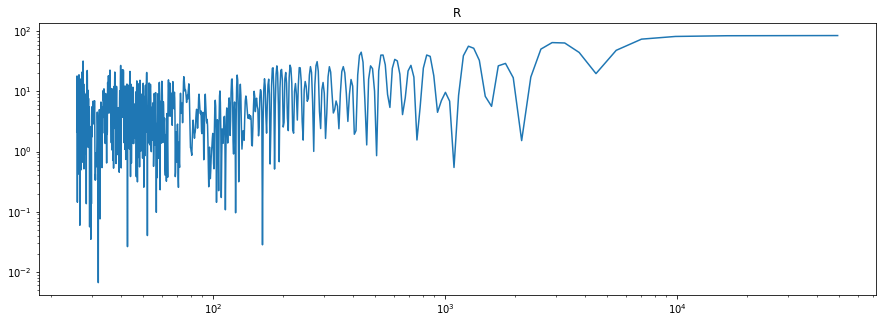

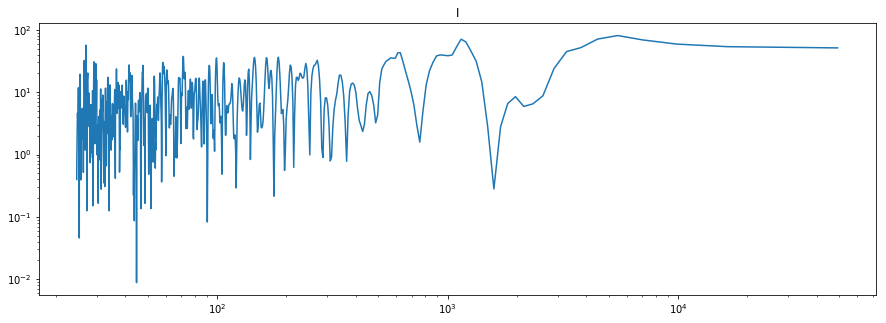

In [13]:
for df,pdf in zip([ux,b,v,r,i],[ux_pgram,b_pgram,v_pgram,r_pgram,i_pgram]):
    period,power = pdf["Period"],pdf["Power"]
    fig, ax = plt.subplots(1, figsize=(15,5))
    ax.loglog(period,power)
    ax.set_title(pdf["Filter"][0])
    plt.savefig(figdir+str(df["filter"][0])+"_loglog.png",dpi=300)

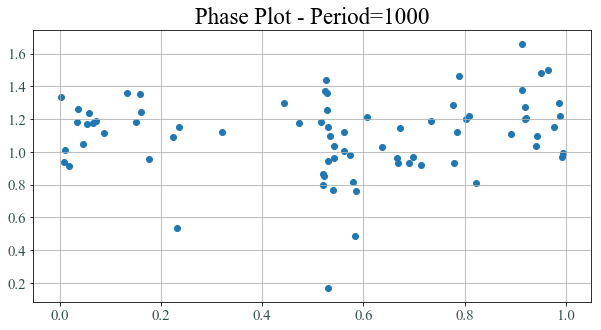

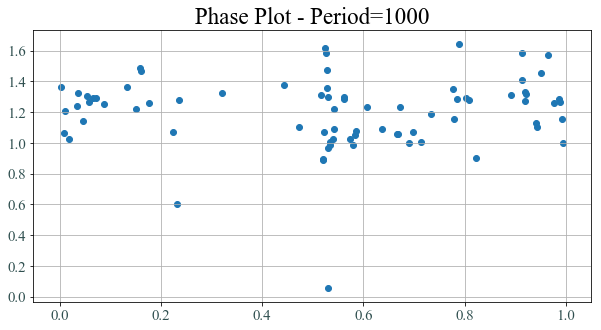

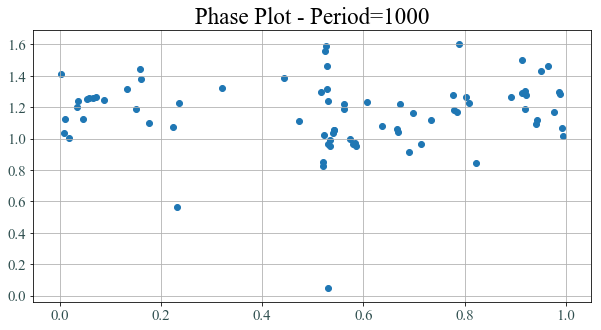

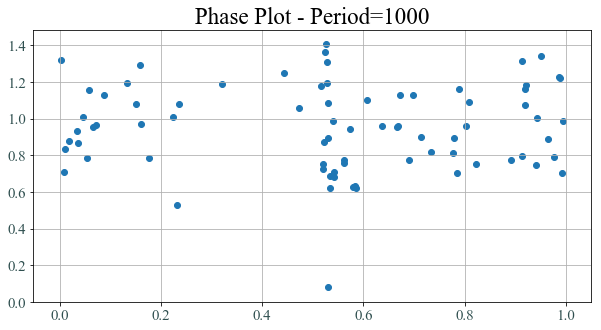

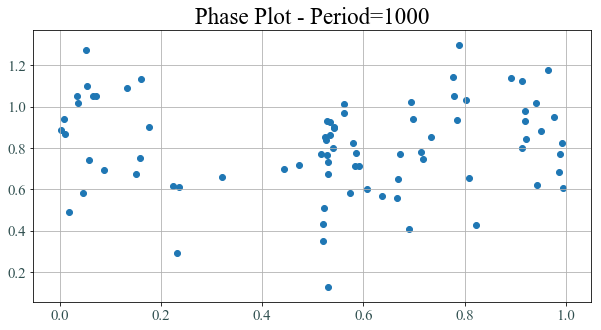

In [14]:
for df in [ux,b,v,r,i]:
    pc.plot_phase_time(df["date"],df["pol"],1000)

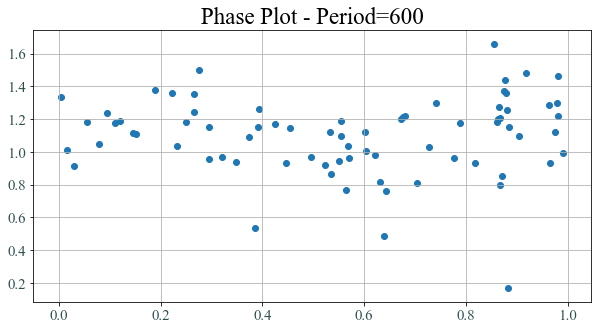

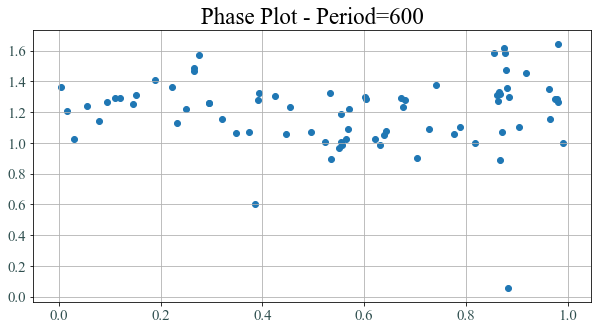

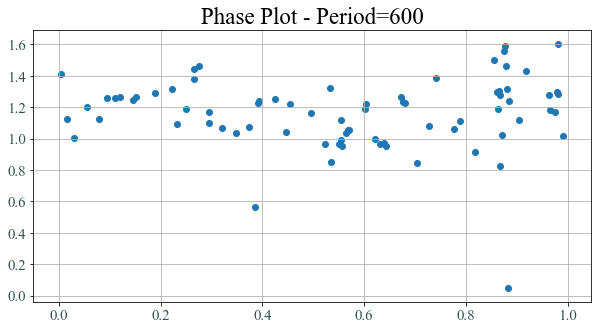

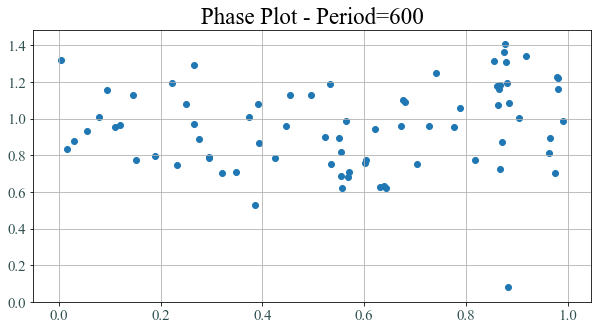

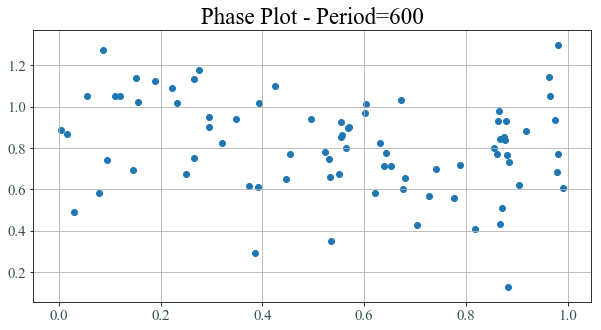

In [15]:
for df in [ux,b,v,r,i]:
    pc.plot_phase_time(df["date"],df["pol"],600)

C:\Users\Keyan\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


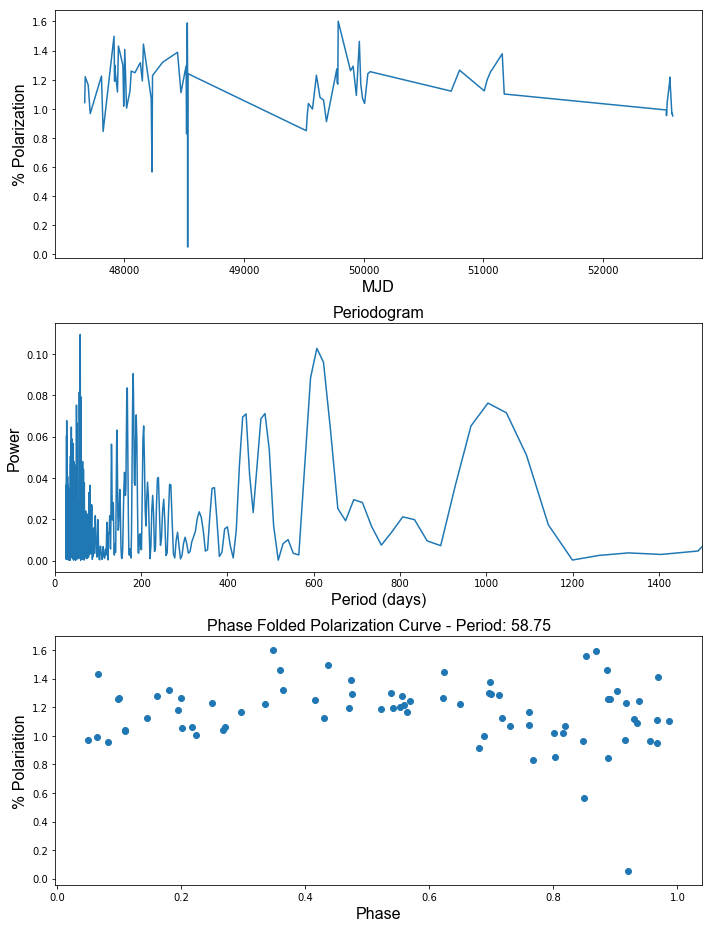

In [41]:
pdf,df = v_pgram,v
date,pol = df["date"],df["pol"]
LS = LombScargle(date,pol)
LS_frequency, power = LS.autopower()
# Converts frequency to period
period = 1 / LS_frequency
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,13),tight_layout=True)
ax1.plot(date,pol)
ax1.set_xlabel("MJD",fontname="Arial",fontsize=16)
ax1.set_ylabel("% Polarization",fontname="Arial",fontsize=16)
ax2.plot(period,power)
ax2.set_xlabel("Period (days)",fontname="Arial",fontsize=16)
ax2.set_ylabel("Power",fontname="Arial",fontsize=16)
ax2.set_title("Periodogram",fontname="Arial",fontsize=16)
ax2.set_xlim(1,1500)
best_period = pc.find_best_period(period, power)
phase_times = (df["date"] / best_period) % 1
ax3.scatter(phase_times,df["pol"])
ax3.set_title("Phase Folded Polarization Curve - Period: "+str(best_period)[:5],fontname="Arial",fontsize=16)
ax3.set_xlabel("Phase",fontname="Arial",fontsize=16)
ax3.set_ylabel("% Polariation",fontname="Arial",fontsize=16)
fig.savefig(posterdir+str(df["filter"][0])+".png",dpi=300,transparent=True,overwrite=True)

In [42]:
v

,index,filter,q,u,pol,pa,qerror,uerror,polerror,paerror,date
0,216,V,0.305318,0.996869,1.042577,36.485694,0.004362,0.004362,0.004362,0.119848,47668.0
1,221,V,0.611083,1.056531,1.220525,29.977743,0.003812,0.003812,0.003812,0.089466,47672.0
2,226,V,0.288983,1.127723,1.164161,37.813503,0.004012,0.004012,0.004012,0.098726,47697.0
3,231,V,0.437259,0.863085,0.967528,31.566080,0.004959,0.004959,0.004959,0.146836,47714.0
4,236,V,0.526968,1.106444,1.225526,32.266437,0.003627,0.003627,0.003627,0.084794,47808.0
5,241,V,0.173614,0.826495,0.844533,39.068464,0.002739,0.002739,0.002739,0.092924,47822.0
6,246,V,0.715604,1.316531,1.498447,30.736800,0.006652,0.006652,0.006652,0.127168,47913.0
7,251,V,0.547386,1.056496,1.189881,31.305341,0.002891,0.002891,0.002891,0.069615,47918.0
8,256,V,0.674958,1.111228,1.300153,29.362790,0.003111,0.003111,0.003111,0.068559,47919.0
9,261,V,0.762248,1.027241,1.279158,26.711663,0.005540,0.005540,0.005540,0.124063,47920.0
